In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%pylab inline
import numpy as np
import duckietown_code_utils as dcu;
import cv2;
%matplotlib inline
%pylab inline

INFO:geometry:version: 2.0.5


Populating the interactive namespace from numpy and matplotlib


DEBUG:commons:version: 6.1.7 *
INFO:typing:version: 6.1.8
INFO:conf_tools:conf_tools 6.0.2


Populating the interactive namespace from numpy and matplotlib


# Image filtering

Now we want to do some basic filtering of the images.

In particular, let's say we want to avoid hitting duckies.

We then need to highlight our duckies in the image.

Let's load a test image.

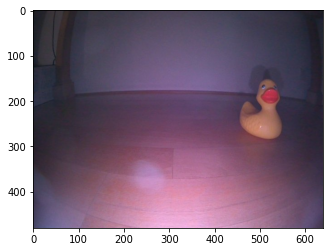

In [2]:
fn = '../samples/big-duck/big-duck-08.jpg' # experiment with different images!
image = dcu.rgb_from_jpg_fn(fn)
imshow(image);

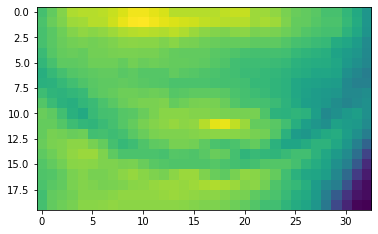

In [3]:
imshow(image[190:210, 507:540, 0])

Let's now convert it to [HSV color space](https://en.wikipedia.org/wiki/HSL_and_HSV) so that it is easier to filter by colors.


In [4]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

In [5]:
np.min(hsv[190:210, 507:540, 1])

73

In OpenCV, the convention is the following:

* Hue is usually measured in degrees, 0 to 360, as shown in [this scale](./hue.png). However OpenCV uses a scale 0 to 179 - multiply by 2 to get the actual Hue in degree. (so to get a hue of 180 you have to tell 90 to OpenCV.
* S and V are from 0 to 255.

We now apply a simple image processing technique to highlight the region corresponding to a certain color.


We define a region in HSV space with the following lower/upper bounds:


In [31]:
lower_hsv = np.array([171, 140, 0])
upper_hsv = np.array([179, 210, 255])

The two arrays have 3 components: H(ue), S(aturation), V(value).

The first array are the lower bounds; the second array are the upper bounds.

This means that we are going to select the pixels that have:

* Hue between OpenCV value 171 and 179, which are regular Hue values 342 to 358.
* Saturation between 140 and 200.
* Value between 0 and 255.



The *hue* is closest to what we intuitively call "color" and the one to use to do simple processing.

This is how to do the filtering of the image and show the result:

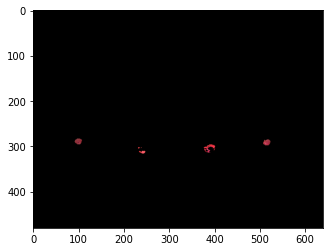

In [32]:
# Returns a matrix of 0 or 1 that satisfy the constraint
mask = cv2.inRange(hsv, lower_hsv, upper_hsv)
imshow(mask);
# Get a "masked image"
masked = cv2.bitwise_and(image, image, mask=mask)
imshow(masked);

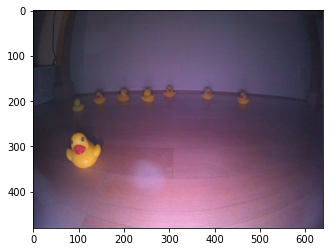

In [44]:
fn = '../samples/many-duckies/many-duckies-02.jpg' # experiment with different images!
image = dcu.rgb_from_jpg_fn(fn)
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
lower_hsv = np.array([171, 140, 0])
upper_hsv = np.array([185, 210, 255])
yellow_lower = np.array([10, 100, 0])
yellow_upper = np.array([70, 255, 255])
mask_1 = cv2.inRange(hsv, lower_hsv, upper_hsv)
mask_2 = cv2.inRange(hsv, yellow_lower, yellow_upper)
mask = np.bitwise_or(mask_1, mask_2)
# mask_yellow = cv2.inRange(hsv, yellow_lower, yellow_upper)
imshow(image);
# output = cv2.bitwise_and(image, image, mask=mask)
# imshow(output);

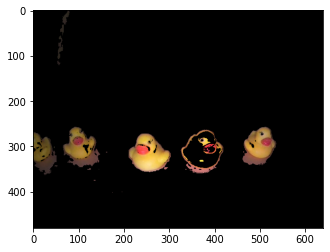

In [13]:
output = cv2.bitwise_and(image, image, mask=mask)
imshow(output);

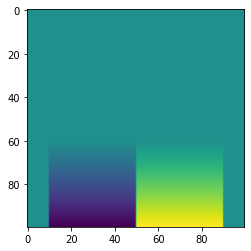

In [59]:
def get_motor_left_matrix(shape):
    res = np.zeros(shape=shape, dtype="float32")  # write your function instead of this one
    W_S, W, W_E = int(shape[1]*0.1), int(shape[1]*0.5), int(shape[1]*0.9)
    H = int(0.6*shape[0])
    res[H:, W_S:W] = np.linspace(0,1, shape[0]-H).repeat(W-W_S).reshape(shape[0]-H,W-W_S)
    res[H:, W:W_E] = -np.linspace(0,1, shape[0]-H).repeat(W_E-W).reshape(shape[0]-H,W_E-W)
    # res[300:, 200:] = 1
    return res

def get_motor_right_matrix(shape):
    res = np.zeros(shape=shape, dtype="float32")  # write your function instead of this one
    W_S, W, W_E = int(shape[1]*0.1), int(shape[1]*0.5), int(shape[1]*0.9)
    H = int(shape[0]*0.6)
    # print(np.linspace(0,1, shape[0]-H).repeat(W-W_S).reshape(shape[0]-H,W-W_S+1))
    # print(np.linspace(0,1,shape[0]-H).repeat(W_E-W).reshape(shape[0]-H,W_E-W+1))
    res[H:, W_S:W] = -np.linspace(0,1, shape[0]-H).repeat(W-W_S).reshape(shape[0]-H,W-W_S)
    res[H:, W:W_E] = np.linspace(0,1,shape[0]-H).repeat(W_E-W).reshape(shape[0]-H,W_E-W)
    return res

imshow(get_motor_left_matrix((100,100)))
imshow(get_motor_right_matrix((100,100)))

# res = np.zeros(shape=shape, dtype="float32") 

# np.linspace(0,1, 4).repeat(4).reshape(4,4)

The bounds we put by default highlight the beak. But we want the yellow of the duckie!

## Activity

Your task now is to change those numbers above so that we highlight the duckies.

For this we suggest to use:

1. [This online color picker](https://pinetools.com/image-color-picker) to click around and get familiar with what color corresponds to which HSV values. (You can use any other tool, the link is just for reference.)

2. In the folder of this notebook there is a program called `HSV-bound.py` which will allow you to do this step interactively, [as shown in this video](https://vimeo.com/534995276).

To get this interactive method running, open a terminal on your computer, **navigate to the exercise folder** (`mooc-exercises/braitenberg/`) and type:


    dts start_gui_tools --vnc --mount $PWD:/braitenberg


then follow the instructions on the terminal to get inside VNC. Once in VNC, open a LXterminal (icon on the Desktop), and run

    python /braitenberg/solution/HSV-bound.py /braitenberg/samples/IMAGENAME

where `IMAGENAME` (including the path and filetype, e.g., `/big-duck/big-duck-10.jpg`) is an image in one of the `samples` subfolders.

For reference, this is how an end result would look like.

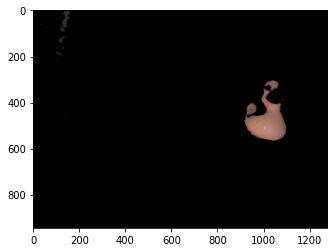

In [34]:
result = dcu.rgb_from_jpg_fn('../samples/result.jpg')
imshow(result);

After you have a satisfactory result, put your values in the file [preprocessing.py](./preprocessing.py).

Now go on to the [third notebook](braitenberg03.ipynb).